In [1]:
# importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading in the dataset

df = pd.read_csv("Train_primo.csv")

In [3]:
df.head()

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,...,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response
0,ID_4A9AR6FQ,1955,Graduation,Divorced,77504.4,1,1,22-06-2014,56,2,...,6,20,3,0,0,0,0,0,0,0
1,ID_X28T3VEK,1958,Graduation,Together,56784.0,0,1,1/8/2013,17,6,...,15,19,6,0,0,0,0,0,0,0
2,ID_AWXARH57,1962,Graduation,Single,103714.8,0,0,21-11-2013,17,0,...,18,37,2,0,0,0,1,0,0,1
3,ID_FQVZHE81,1979,2n Cycle,Single,46311.6,1,0,13-09-2013,49,3,...,24,24,8,0,0,0,0,0,0,0
4,ID_QVLWGPRN,1959,Graduation,Married,87486.0,0,0,21-01-2014,59,1,...,165,203,1,0,0,0,1,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1568 entries, 0 to 1567
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       1568 non-null   object 
 1   Year_of_Birth            1568 non-null   int64  
 2   Education_Level          1568 non-null   object 
 3   Marital_Status           1568 non-null   object 
 4   Disposable_Income        1552 non-null   float64
 5   No_of_Kids_in_home       1568 non-null   int64  
 6   No_of_Teen_in_home       1568 non-null   int64  
 7   Date_Customer            1568 non-null   object 
 8   Recency                  1568 non-null   int64  
 9   Discounted_Purchases     1568 non-null   int64  
 10  WebPurchases             1568 non-null   int64  
 11  CatalogPurchases         1568 non-null   int64  
 12  StorePurchases           1568 non-null   int64  
 13  Amount_on_Wines          1568 non-null   int64  
 14  Amount_on_Fruits        

In [5]:
# Changing date_customer to datetime

df["Date_Customer"] = pd.to_datetime(df["Date_Customer"])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1568 entries, 0 to 1567
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID                       1568 non-null   object        
 1   Year_of_Birth            1568 non-null   int64         
 2   Education_Level          1568 non-null   object        
 3   Marital_Status           1568 non-null   object        
 4   Disposable_Income        1552 non-null   float64       
 5   No_of_Kids_in_home       1568 non-null   int64         
 6   No_of_Teen_in_home       1568 non-null   int64         
 7   Date_Customer            1568 non-null   datetime64[ns]
 8   Recency                  1568 non-null   int64         
 9   Discounted_Purchases     1568 non-null   int64         
 10  WebPurchases             1568 non-null   int64         
 11  CatalogPurchases         1568 non-null   int64         
 12  StorePurchases           1568 non-

In [7]:
# Feature_creation and clustering

df.describe()

,Year_of_Birth,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,...,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response
count,1568.000000,1552.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,...,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000
mean,1970.073342,62381.186598,0.460459,0.497449,55.408801,2.292730,4.001276,2.665816,5.703444,303.190051,...,26.800383,43.739158,5.326531,0.072704,0.072704,0.080357,0.064413,0.012755,0.008291,0.152423
std,11.920781,32089.169563,0.540361,0.544151,28.788037,1.937544,2.773748,3.043493,3.260553,340.141396,...,40.857657,51.591557,2.468023,0.259733,0.259733,0.271932,0.245566,0.112252,0.090705,0.359546
min,1900.000000,2076.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1960.000000,41612.400000,0.000000,0.000000,31.000000,1.000000,2.000000,0.000000,3.000000,27.000000,...,1.000000,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1971.000000,60964.200000,0.000000,0.000000,56.000000,2.000000,3.000000,2.000000,5.000000,167.000000,...,8.000000,25.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1979.000000,81493.200000,1.000000,1.000000,80.000000,3.000000,6.000000,4.000000,8.000000,499.500000,...,33.000000,56.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1997.000000,799999.200000,2.000000,2.000000,106.000000,15.000000,27.000000,28.000000,13.000000,1498.000000,...,263.000000,362.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
# Resizing the columns

pd.options.display.max_columns=50
df.head()

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response
0,ID_4A9AR6FQ,1955,Graduation,Divorced,77504.4,1,1,2014-06-22,56,2,1,1,4,71,3,16,0,6,20,3,0,0,0,0,0,0,0
1,ID_X28T3VEK,1958,Graduation,Together,56784.0,0,1,2013-01-08,17,6,5,1,8,205,22,111,50,15,19,6,0,0,0,0,0,0,0
2,ID_AWXARH57,1962,Graduation,Single,103714.8,0,0,2013-11-21,17,0,7,4,7,469,31,873,29,18,37,2,0,0,0,1,0,0,1
3,ID_FQVZHE81,1979,2n Cycle,Single,46311.6,1,0,2013-09-13,49,3,4,1,3,56,15,49,17,24,24,8,0,0,0,0,0,0,0
4,ID_QVLWGPRN,1959,Graduation,Married,87486.0,0,0,2014-01-21,59,1,3,7,9,412,117,445,181,165,203,1,0,0,0,1,0,0,0


In [9]:
# Checking the columns
df.columns

Index(['ID', 'Year_of_Birth', 'Education_Level', 'Marital_Status',
       'Disposable_Income', 'No_of_Kids_in_home', 'No_of_Teen_in_home',
       'Date_Customer', 'Recency', 'Discounted_Purchases', 'WebPurchases',
       'CatalogPurchases', 'StorePurchases', 'Amount_on_Wines',
       'Amount_on_Fruits', 'Amount_on_MeatProducts', 'Amount_on_FishProducts',
       'Amount_on_SweetProducts', 'Amount_on_GoldProds', 'WebVisitsMonth',
       'Cmp3Accepted', 'Cmp4Accepted', 'Cmp5Accepted', 'Cmp1Accepted',
       'Cmp2Accepted', 'Any_Complain', 'Response'],
      dtype='object')

### **Description**

ID: Unique identifier for each User
•	Year_of_Birth: Year of birth\
•	Education_Level: The highest level of education attained by the User\
•	Marital_Status: Marital status\
•	Disposable_Income: Yearly User’s household disposable income\
•	No_of_Kids_in_home: total count of children in the user’s home\
•	No_of_Teen_in_home: Number of teenagers in the User's household\
•	Date_Customer: Date of User's enrollment with the company\
•	Recency: Number of days since User's last purchase\
•	Discounted_Purchases: Counts of purchases made by the user using coupons\
•	WebPurchases: Counts of purchases made by the user through the company’s website\
•	CatalogPurchases: Counts of purchases made by the user using a catalogue\
•	StorePurchases: Counts of purchases made by the user directly in stores\
•	Amount_on_Wines: Total amount user spent on wine and drinks within the last 3 years\
•	Amount_on_Fruits: Total amount user spent on fruity food within the last 3 years\
•	Amount_on_MeatProducts: Total amount user spent on meat products and l\


### Recency, Frequency, Monetary Analysis (To get a final rating using a ranking method)

What does RFM stand for in business?
What is RFM (recency, frequency, monetary) analysis?
RFM analysis is a marketing technique used to quantitatively rank and group customers based on the recency, frequency and monetary total of their recent transactions to identify the best customers and perform targeted marketing campaigns.

In [10]:
df.shape

(1568, 27)

In [11]:
df.duplicated().sum()

0

In [12]:
df.isna().sum()

ID                          0
Year_of_Birth               0
Education_Level             0
Marital_Status              0
Disposable_Income          16
No_of_Kids_in_home          0
No_of_Teen_in_home          0
Date_Customer               0
Recency                     0
Discounted_Purchases        0
WebPurchases                0
CatalogPurchases            0
StorePurchases              0
Amount_on_Wines             0
Amount_on_Fruits            0
Amount_on_MeatProducts      0
Amount_on_FishProducts      0
Amount_on_SweetProducts     0
Amount_on_GoldProds         0
WebVisitsMonth              0
Cmp3Accepted                0
Cmp4Accepted                0
Cmp5Accepted                0
Cmp1Accepted                0
Cmp2Accepted                0
Any_Complain                0
Response                    0
dtype: int64

In [13]:
df["Education_Level"].unique()

array(['Graduation', '2n Cycle', 'Master', 'PhD', 'Basic'], dtype=object)

In [14]:
df["Marital_Status"].unique()

array(['Divorced', 'Together', 'Single', 'Married', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [15]:
df["Year_of_Birth"].unique()

array([1955, 1958, 1962, 1979, 1959, 1960, 1953, 1974, 1966, 1975, 1989,
       1956, 1976, 1970, 1965, 1977, 1952, 1981, 1951, 1995, 1973, 1972,
       1971, 1988, 1984, 1990, 1986, 1969, 1900, 1967, 1987, 1992, 1968,
       1963, 1957, 1944, 1961, 1950, 1954, 1982, 1991, 1947, 1985, 1978,
       1980, 1964, 1983, 1949, 1993, 1948, 1994, 1946, 1942, 1945, 1996,
       1997], dtype=int64)

In [16]:
df[df["Disposable_Income"].isnull()]

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response
128,ID_2ZFDRTZK,1970,Master,Together,NaN,1,1,2013-05-18,59,7,4,10,4,380,45,48,94,66,96,3,0,0,0,0,0,0,0
155,ID_0Q6ZGI80,1960,PhD,Single,NaN,0,0,2013-05-11,87,1,1,3,4,86,14,50,3,2,39,2,0,0,0,0,0,0,0
166,ID_3RPO0ZH5,1979,2n Cycle,Together,NaN,0,0,2012-12-08,60,0,0,0,1,37,5,1607,12,4,22,0,0,1,0,0,0,0,0
288,ID_LVEIIFN2,1983,Graduation,Single,NaN,1,0,2013-06-17,64,2,2,0,3,16,6,22,2,2,6,6,0,0,0,0,0,0,0
423,ID_LZNSOQRD,1990,Graduation,Married,NaN,0,0,2013-03-06,76,1,6,5,12,866,141,461,60,30,61,3,0,1,0,1,0,0,0
462,ID_EVQSLYK9,1984,Graduation,Married,NaN,1,0,2013-11-15,18,1,1,0,2,10,8,6,0,2,1,7,0,0,0,0,0,0,0
552,ID_B585A0J8,1971,Graduation,Single,NaN,1,2,2013-08-23,74,6,2,3,10,743,23,172,52,50,20,7,0,1,0,1,0,0,0
562,ID_X42EP1QB,1955,Master,Together,NaN,0,1,2013-06-23,90,2,4,1,4,166,3,22,0,0,24,6,0,0,0,0,0,0,0
588,ID_SEOQWEOJ,1973,PhD,Together,NaN,1,0,2014-02-03,24,1,1,0,3,30,4,13,0,0,3,7,0,0,0,0,0,0,0
642,ID_O6ZRF42T,1987,Graduation,Single,NaN,1,0,2013-02-20,26,0,27,0,0,10,4,3,3,263,362,1,0,0,0,0,0,0,0


In [17]:
df['Year_Date'] =  df['Date_Customer'].dt.year

In [18]:
df.columns

Index(['ID', 'Year_of_Birth', 'Education_Level', 'Marital_Status',
       'Disposable_Income', 'No_of_Kids_in_home', 'No_of_Teen_in_home',
       'Date_Customer', 'Recency', 'Discounted_Purchases', 'WebPurchases',
       'CatalogPurchases', 'StorePurchases', 'Amount_on_Wines',
       'Amount_on_Fruits', 'Amount_on_MeatProducts', 'Amount_on_FishProducts',
       'Amount_on_SweetProducts', 'Amount_on_GoldProds', 'WebVisitsMonth',
       'Cmp3Accepted', 'Cmp4Accepted', 'Cmp5Accepted', 'Cmp1Accepted',
       'Cmp2Accepted', 'Any_Complain', 'Response', 'Year_Date'],
      dtype='object')

In [19]:
df["Year_Date"].unique()   #dt.month, dt.day_of_the_week

array([2014, 2013, 2012], dtype=int64)

In [20]:
#Extracting months from date_customer

df["month"] = df["Date_Customer"].dt.month

df["month"].nunique()

12

In [21]:
# Getting months by name #Can pass in locale in the month_name method e.g.dt.month_name(locale="french")

df['month_name'] =  df['Date_Customer'].dt.month_name().str[:3]

df["month_name"].head()

0    Jun
1    Jan
2    Nov
3    Sep
4    Jan
Name: month_name, dtype: object

In [22]:
# Getting day of the week
#Monday = 0    Sunday = 6
df["Weekday"] = df["Date_Customer"].dt.weekday    


df["Weekday"].unique()

array([6, 1, 3, 4, 0, 2, 5], dtype=int64)

In [23]:
# Day of the week in words

df["Weekday_name"] = df["Date_Customer"].dt.day_name()
df["Weekday_name"].unique()

array(['Sunday', 'Tuesday', 'Thursday', 'Friday', 'Monday', 'Wednesday',
       'Saturday'], dtype=object)

In [24]:
# Check if it's month end

df["month_end"] = df["Date_Customer"].dt.is_month_end
df["month_end"].value_counts()

False    1513
True       55
Name: month_end, dtype: int64

In [25]:
df[["Date_Customer", "month_end"]].sample(10)

,Date_Customer,month_end
233,2012-12-31,True
905,2013-09-17,False
917,2013-02-14,False
276,2013-11-23,False
211,2014-04-19,False
691,2013-08-10,False
266,2014-05-04,False
940,2013-09-14,False
816,2014-05-18,False
550,2013-07-27,False


In [26]:
df[df["Year_Date"] == 2012][["Date_Customer", "month_end"]]

,Date_Customer,month_end
6,2012-11-27,False
11,2012-10-08,False
12,2012-11-18,False
13,2012-10-29,False
14,2012-09-11,False
...,...,...
1529,2012-07-31,True
1530,2012-09-25,False
1531,2012-12-23,False
1545,2012-08-22,False


In [27]:
df.columns

Index(['ID', 'Year_of_Birth', 'Education_Level', 'Marital_Status',
       'Disposable_Income', 'No_of_Kids_in_home', 'No_of_Teen_in_home',
       'Date_Customer', 'Recency', 'Discounted_Purchases', 'WebPurchases',
       'CatalogPurchases', 'StorePurchases', 'Amount_on_Wines',
       'Amount_on_Fruits', 'Amount_on_MeatProducts', 'Amount_on_FishProducts',
       'Amount_on_SweetProducts', 'Amount_on_GoldProds', 'WebVisitsMonth',
       'Cmp3Accepted', 'Cmp4Accepted', 'Cmp5Accepted', 'Cmp1Accepted',
       'Cmp2Accepted', 'Any_Complain', 'Response', 'Year_Date', 'month',
       'month_name', 'Weekday', 'Weekday_name', 'month_end'],
      dtype='object')

In [28]:
df["Year_of_Birth"].unique()

array([1955, 1958, 1962, 1979, 1959, 1960, 1953, 1974, 1966, 1975, 1989,
       1956, 1976, 1970, 1965, 1977, 1952, 1981, 1951, 1995, 1973, 1972,
       1971, 1988, 1984, 1990, 1986, 1969, 1900, 1967, 1987, 1992, 1968,
       1963, 1957, 1944, 1961, 1950, 1954, 1982, 1991, 1947, 1985, 1978,
       1980, 1964, 1983, 1949, 1993, 1948, 1994, 1946, 1942, 1945, 1996,
       1997], dtype=int64)

In [29]:
#To get today's date
import datetime as dt
dt.date.today().year #syntax to get today's date

2022

In [30]:
# To get the Age of the customers: Today's date - Year of Birth column
df["Age"] = dt.date.today().year - df['Year_of_Birth']
df[['ID',"Age"]]
#alternative is to hardcode today's date: "2022" - Year Of Birth

,ID,Age
0,ID_4A9AR6FQ,67
1,ID_X28T3VEK,64
2,ID_AWXARH57,60
3,ID_FQVZHE81,43
4,ID_QVLWGPRN,63
...,...,...
1563,ID_XWINUFGG,52
1564,ID_GLVIHZLR,42
1565,ID_O11VSIJY,70
1566,ID_VS37P6MS,58


In [31]:
df.Marital_Status.unique()

array(['Divorced', 'Together', 'Single', 'Married', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [32]:
df.Marital_Status.value_counts()

Married     615
Together    409
Single      329
Divorced    159
Widow        50
Alone         3
YOLO          2
Absurd        1
Name: Marital_Status, dtype: int64

In [33]:
# Using a conditional statement within a function to create a column(Rel_Status) 
# that re-categorizes Marital_Status column
def Marr_Cat(x): #name of the function - Marr_Cat
    
    if x in ["Married","Together"]:
        result = "In_Relationship"  #Category 1
        return result
    elif x in ["Divorced","Widow"]:
        result = "Not_In_Relationship" #Category 2
        return result
    else:
        result = "Alone" #Category 3
        return result

df["Rel_Status"] = df["Marital_Status"].apply(Marr_Cat)  #applying the function to the Marital Status column
df[["Marital_Status","Rel_Status"]].sample(20) #checking a sample of Marital Status and Rel_Status column

    

,Marital_Status,Rel_Status
1070,Single,Alone
1359,Married,In_Relationship
746,Together,In_Relationship
333,Single,Alone
834,Married,In_Relationship
944,Married,In_Relationship
504,Together,In_Relationship
249,Single,Alone
509,Married,In_Relationship
1450,Single,Alone


In [34]:
#checking the Marital Status and the Rel_Status columns
print(df.Marital_Status.unique())
print('\r')
print(df.Rel_Status.unique())

['Divorced' 'Together' 'Single' 'Married' 'Widow' 'Alone' 'Absurd' 'YOLO']

['Not_In_Relationship' 'In_Relationship' 'Alone']


In [35]:
df.columns

Index(['ID', 'Year_of_Birth', 'Education_Level', 'Marital_Status',
       'Disposable_Income', 'No_of_Kids_in_home', 'No_of_Teen_in_home',
       'Date_Customer', 'Recency', 'Discounted_Purchases', 'WebPurchases',
       'CatalogPurchases', 'StorePurchases', 'Amount_on_Wines',
       'Amount_on_Fruits', 'Amount_on_MeatProducts', 'Amount_on_FishProducts',
       'Amount_on_SweetProducts', 'Amount_on_GoldProds', 'WebVisitsMonth',
       'Cmp3Accepted', 'Cmp4Accepted', 'Cmp5Accepted', 'Cmp1Accepted',
       'Cmp2Accepted', 'Any_Complain', 'Response', 'Year_Date', 'month',
       'month_name', 'Weekday', 'Weekday_name', 'month_end', 'Age',
       'Rel_Status'],
      dtype='object')

In [36]:
df.Education_Level.value_counts()

Graduation    802
PhD           340
Master        246
2n Cycle      142
Basic          38
Name: Education_Level, dtype: int64

### Using two methods to create a new column.

**.map method**

In [37]:
Edu_Cat = {"Basic":1,"Graduation":2,"2n Cycle":3,"Master":4,"PhD":5} #creating a dictionary(Key:value)
df["Education_Rank"] = df.Education_Level.map(Edu_Cat) #map is a default function - map applies Edu_Cat
df[["Education_Level","Education_Rank"]].sample(10) #checking the two relevant columns

,Education_Level,Education_Rank
86,Graduation,2
552,Graduation,2
25,Graduation,2
1381,Graduation,2
482,Graduation,2
907,Master,4
246,PhD,5
1395,PhD,5
1440,2n Cycle,3
1284,Graduation,2


**Using lamba function**

In [38]:
# Using a lambda function which loops through the dictionary, applying the value to the key
# Apply function works as a loop(loops through every key to find the corresponding value to assign it)
#Apply function is a function that works with another function
Edu_Cat = {"Basic":1,"Graduation":2,"2n Cycle":3,"Master":4,"PhD":5} 
df['Education_Rank'] = df['Education_Level'].apply(lambda y: Edu_Cat.get(y)) #.get is a default function; x or y suffices
df[["Education_Level","Education_Rank"]].sample(10)

,Education_Level,Education_Rank
1414,Graduation,2
543,Graduation,2
1357,Master,4
381,2n Cycle,3
1557,Graduation,2
1477,Graduation,2
1014,Graduation,2
1101,Graduation,2
520,2n Cycle,3
1403,Graduation,2


In [39]:
# example
Edu_Cat.get("Basic")

1

In [40]:
df.sample(10)

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response,Year_Date,month,month_name,Weekday,Weekday_name,month_end,Age,Rel_Status,Education_Rank
1559,ID_BZKYQ4N3,1984,Graduation,Single,28886.4,1,0,2013-04-16,86,1,1,0,2,14,4,6,3,0,4,8,0,0,0,0,0,0,0,2013,4,Apr,1,Tuesday,False,38,Alone,2
1353,ID_LQWREIBC,1963,PhD,Single,40102.8,0,1,2013-08-17,83,2,2,0,4,61,3,12,0,0,18,7,0,0,0,0,0,0,0,2013,8,Aug,5,Saturday,False,59,Alone,5
892,ID_8WEX7X1V,1967,Graduation,Single,44484.0,1,1,2013-03-20,37,9,5,1,8,236,10,137,4,15,39,7,0,0,0,0,0,0,1,2013,3,Mar,2,Wednesday,False,55,Alone,2
1409,ID_JCQL5SS1,1967,Graduation,Together,98912.4,0,0,2014-12-03,42,1,3,5,12,487,150,509,104,107,107,1,0,0,1,0,0,0,0,2014,12,Dec,2,Wednesday,False,55,In_Relationship,2
949,ID_Q6LRLYCH,1962,PhD,Together,76010.4,0,1,2012-10-16,55,3,8,3,5,923,24,118,13,10,21,6,0,1,0,0,0,0,1,2012,10,Oct,1,Tuesday,False,60,In_Relationship,5
205,ID_LT0M3ZV5,1977,Graduation,Together,61642.8,0,1,2012-10-25,91,2,8,2,4,302,10,79,0,11,182,8,0,0,0,0,0,0,0,2012,10,Oct,3,Thursday,False,45,In_Relationship,2
335,ID_4A92XHR9,1976,Graduation,Married,33087.6,1,0,2013-03-25,52,4,5,1,4,55,18,110,39,15,15,8,0,0,0,0,0,0,0,2013,3,Mar,0,Monday,False,46,In_Relationship,2
505,ID_GOX7BYHZ,1970,Graduation,Together,46033.2,1,0,2013-12-27,81,3,3,1,3,44,3,56,20,8,14,7,0,0,0,0,0,0,0,2013,12,Dec,4,Friday,False,52,In_Relationship,2
140,ID_JALQD74D,1977,PhD,Divorced,84214.8,0,1,2013-07-21,17,3,7,3,13,537,91,168,69,44,133,5,0,0,0,0,0,0,0,2013,7,Jul,6,Sunday,False,45,Not_In_Relationship,5
332,ID_3RH8JCYH,1958,PhD,Together,8202.0,0,1,2012-08-12,83,0,0,0,1,112,5,12,2,2,12,20,0,0,0,0,0,0,0,2012,8,Aug,6,Sunday,False,64,In_Relationship,5


In [41]:
df.describe()

,Year_of_Birth,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response,Year_Date,month,Weekday,Age,Education_Rank
count,1568.000000,1552.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000
mean,1970.073342,62381.186598,0.460459,0.497449,55.408801,2.292730,4.001276,2.665816,5.703444,303.190051,29.091199,168.376276,37.166454,26.800383,43.739158,5.326531,0.072704,0.072704,0.080357,0.064413,0.012755,0.008291,0.152423,2013.019133,6.568878,3.087372,51.926658,3.030612
std,11.920781,32089.169563,0.540361,0.544151,28.788037,1.937544,2.773748,3.043493,3.260553,340.141396,39.565637,233.419980,53.994951,40.857657,51.591557,2.468023,0.259733,0.259733,0.271932,0.245566,0.112252,0.090705,0.359546,0.685070,3.518441,2.018585,11.920781,1.277794
min,1900.000000,2076.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2012.000000,1.000000,0.000000,25.000000,1.000000
25%,1960.000000,41612.400000,0.000000,0.000000,31.000000,1.000000,2.000000,0.000000,3.000000,27.000000,4.000000,15.000000,3.000000,1.000000,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.000000,3.000000,1.000000,43.000000,2.000000
50%,1971.000000,60964.200000,0.000000,0.000000,56.000000,2.000000,3.000000,2.000000,5.000000,167.000000,11.000000,64.000000,12.000000,8.000000,25.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.000000,7.000000,3.000000,51.000000,2.000000
75%,1979.000000,81493.200000,1.000000,1.000000,80.000000,3.000000,6.000000,4.000000,8.000000,499.500000,36.000000,232.000000,49.250000,33.000000,56.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.000000,10.000000,5.000000,62.000000,4.000000
max,1997.000000,799999.200000,2.000000,2.000000,106.000000,15.000000,27.000000,28.000000,13.000000,1498.000000,202.000000,1725.000000,259.000000,263.000000,362.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2014.000000,12.000000,6.000000,122.000000,5.000000


### Questions 
1. How relationship status and disposable income determines spending
2. Let’s see the average disposable income persons from each educational level have
3. Educational status of your customers and how they spend
4. edu level and disp income
5. Age and spending relationship
6. customers with a Rel Status described as Single or Divorced only.

### Replacing the null values in the Disposable Income column with the median according to their education level

#### Subsetting the original dataframe to get records where disposable income is not null

In [42]:
df2 =df[df.notnull()]
df2

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response,Year_Date,month,month_name,Weekday,Weekday_name,month_end,Age,Rel_Status,Education_Rank
0,ID_4A9AR6FQ,1955,Graduation,Divorced,77504.4,1,1,2014-06-22,56,2,1,1,4,71,3,16,0,6,20,3,0,0,0,0,0,0,0,2014,6,Jun,6,Sunday,False,67,Not_In_Relationship,2
1,ID_X28T3VEK,1958,Graduation,Together,56784.0,0,1,2013-01-08,17,6,5,1,8,205,22,111,50,15,19,6,0,0,0,0,0,0,0,2013,1,Jan,1,Tuesday,False,64,In_Relationship,2
2,ID_AWXARH57,1962,Graduation,Single,103714.8,0,0,2013-11-21,17,0,7,4,7,469,31,873,29,18,37,2,0,0,0,1,0,0,1,2013,11,Nov,3,Thursday,False,60,Alone,2
3,ID_FQVZHE81,1979,2n Cycle,Single,46311.6,1,0,2013-09-13,49,3,4,1,3,56,15,49,17,24,24,8,0,0,0,0,0,0,0,2013,9,Sep,4,Friday,False,43,Alone,3
4,ID_QVLWGPRN,1959,Graduation,Married,87486.0,0,0,2014-01-21,59,1,3,7,9,412,117,445,181,165,203,1,0,0,0,1,0,0,0,2014,1,Jan,1,Tuesday,False,63,In_Relationship,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1563,ID_XWINUFGG,1970,Graduation,Married,52893.6,1,1,2014-06-19,24,2,2,0,3,29,4,10,2,0,4,5,0,0,0,0,0,0,0,2014,6,Jun,3,Thursday,False,52,In_Relationship,2
1564,ID_GLVIHZLR,1980,Graduation,Single,74190.0,0,1,2013-07-08,63,1,4,2,8,167,53,100,55,30,27,4,0,0,0,0,0,0,0,2013,7,Jul,0,Monday,False,42,Alone,2
1565,ID_O11VSIJY,1952,Master,Married,80857.2,0,1,2013-01-15,74,4,2,2,9,820,11,53,11,0,70,7,0,1,0,0,0,0,0,2013,1,Jan,1,Tuesday,False,70,In_Relationship,4
1566,ID_VS37P6MS,1964,PhD,Single,58701.6,1,1,2014-12-04,28,2,1,0,4,57,3,9,0,0,1,4,0,0,0,0,0,0,0,2014,12,Dec,3,Thursday,False,58,Alone,5


Determining the **mean** disposable income based on their educational level and education rank

In [43]:
# mean
df2.groupby(["Education_Level", "Education_Rank"])[["Disposable_Income"]].mean().sort_values("Disposable_Income",ascending=False)

,,Disposable_Income
Education_Level,Education_Rank,
PhD,5,66377.692857
Master,4,63849.029752
Graduation,2,63115.059623
2n Cycle,3,56237.140426
Basic,1,25140.063158


Determining the **median** disposable income based on their educational level and education rank

In [44]:
#median 
df2.groupby(["Education_Level", "Education_Rank"])[["Disposable_Income"]].median().sort_values("Disposable_Income",ascending=False)

,,Disposable_Income
Education_Level,Education_Rank,
PhD,5,65272.8
Graduation,2,61544.4
Master,4,61521.6
2n Cycle,3,55612.8
Basic,1,27014.4


Replacing empty disposable income with the median disposable income based on the educational level and education rank

In [45]:
df["Disposable_Income"].fillna(df2.groupby(["Education_Level", "Education_Rank"])
                               ["Disposable_Income"].transform("median"),inplace=True)
df

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response,Year_Date,month,month_name,Weekday,Weekday_name,month_end,Age,Rel_Status,Education_Rank
0,ID_4A9AR6FQ,1955,Graduation,Divorced,77504.4,1,1,2014-06-22,56,2,1,1,4,71,3,16,0,6,20,3,0,0,0,0,0,0,0,2014,6,Jun,6,Sunday,False,67,Not_In_Relationship,2
1,ID_X28T3VEK,1958,Graduation,Together,56784.0,0,1,2013-01-08,17,6,5,1,8,205,22,111,50,15,19,6,0,0,0,0,0,0,0,2013,1,Jan,1,Tuesday,False,64,In_Relationship,2
2,ID_AWXARH57,1962,Graduation,Single,103714.8,0,0,2013-11-21,17,0,7,4,7,469,31,873,29,18,37,2,0,0,0,1,0,0,1,2013,11,Nov,3,Thursday,False,60,Alone,2
3,ID_FQVZHE81,1979,2n Cycle,Single,46311.6,1,0,2013-09-13,49,3,4,1,3,56,15,49,17,24,24,8,0,0,0,0,0,0,0,2013,9,Sep,4,Friday,False,43,Alone,3
4,ID_QVLWGPRN,1959,Graduation,Married,87486.0,0,0,2014-01-21,59,1,3,7,9,412,117,445,181,165,203,1,0,0,0,1,0,0,0,2014,1,Jan,1,Tuesday,False,63,In_Relationship,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1563,ID_XWINUFGG,1970,Graduation,Married,52893.6,1,1,2014-06-19,24,2,2,0,3,29,4,10,2,0,4,5,0,0,0,0,0,0,0,2014,6,Jun,3,Thursday,False,52,In_Relationship,2
1564,ID_GLVIHZLR,1980,Graduation,Single,74190.0,0,1,2013-07-08,63,1,4,2,8,167,53,100,55,30,27,4,0,0,0,0,0,0,0,2013,7,Jul,0,Monday,False,42,Alone,2
1565,ID_O11VSIJY,1952,Master,Married,80857.2,0,1,2013-01-15,74,4,2,2,9,820,11,53,11,0,70,7,0,1,0,0,0,0,0,2013,1,Jan,1,Tuesday,False,70,In_Relationship,4
1566,ID_VS37P6MS,1964,PhD,Single,58701.6,1,1,2014-12-04,28,2,1,0,4,57,3,9,0,0,1,4,0,0,0,0,0,0,0,2014,12,Dec,3,Thursday,False,58,Alone,5


In [46]:
#sample of a customer whose had no disposable income now assigned a median disposable income 
df[df["ID"]=="ID_2ZFDRTZK"]

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response,Year_Date,month,month_name,Weekday,Weekday_name,month_end,Age,Rel_Status,Education_Rank
128,ID_2ZFDRTZK,1970,Master,Together,61521.6,1,1,2013-05-18,59,7,4,10,4,380,45,48,94,66,96,3,0,0,0,0,0,0,0,2013,5,May,5,Saturday,False,52,In_Relationship,4


#Questions

1. How relationship status and disposable income determines spending
2. Let’s see the average disposable income persons from each educational level have
3. Educational status of your customers and how they spend
4. Edu level and disp income
5. Age and spending relationship
6. Year of birth and how they spend
7. Customers with a Rel Status described as Single or Divorced only.
8. No kids in home and spending.
9. Relationship btn income n no. of kids in home

In [47]:
df.columns

Index(['ID', 'Year_of_Birth', 'Education_Level', 'Marital_Status',
       'Disposable_Income', 'No_of_Kids_in_home', 'No_of_Teen_in_home',
       'Date_Customer', 'Recency', 'Discounted_Purchases', 'WebPurchases',
       'CatalogPurchases', 'StorePurchases', 'Amount_on_Wines',
       'Amount_on_Fruits', 'Amount_on_MeatProducts', 'Amount_on_FishProducts',
       'Amount_on_SweetProducts', 'Amount_on_GoldProds', 'WebVisitsMonth',
       'Cmp3Accepted', 'Cmp4Accepted', 'Cmp5Accepted', 'Cmp1Accepted',
       'Cmp2Accepted', 'Any_Complain', 'Response', 'Year_Date', 'month',
       'month_name', 'Weekday', 'Weekday_name', 'month_end', 'Age',
       'Rel_Status', 'Education_Rank'],
      dtype='object')

<AxesSubplot:>

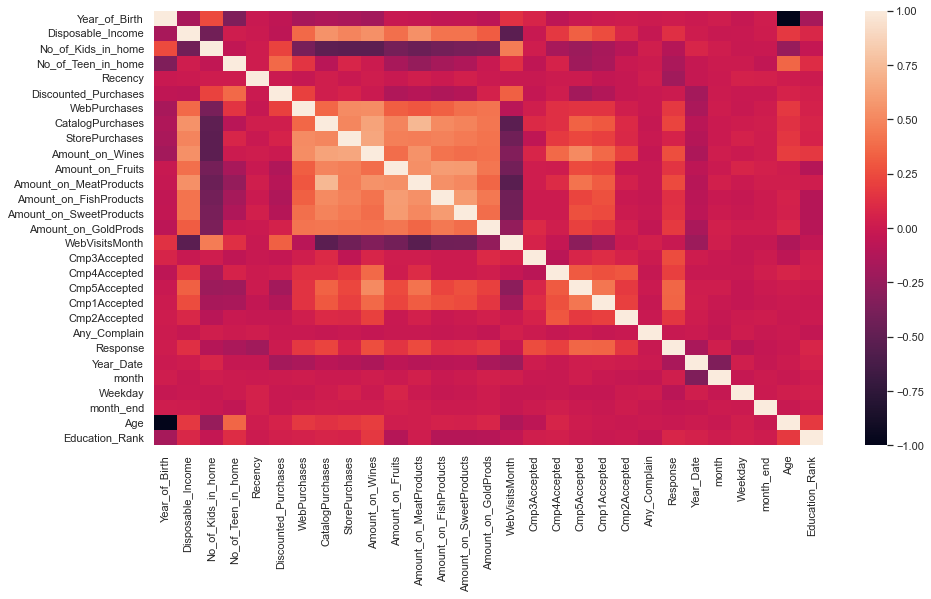

In [48]:
#correlation map for all the columns
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df.corr())


In [49]:
#creating a new column for Marital_rank
Mar_Stat = {"In_Relationship":1,"Not_In_Relationship":2,"Alone":3} #creating a dictionary(Key:value)
df["Marital_Rank"] = df["Rel_Status"].map(Mar_Stat) #map is a default function - map applies Edu_Cat
df[["Rel_Status","Marital_Rank"]].sample(10) 

,Rel_Status,Marital_Rank
257,In_Relationship,1
269,In_Relationship,1
35,Not_In_Relationship,2
1160,In_Relationship,1
662,Alone,3
715,Not_In_Relationship,2
553,Alone,3
608,In_Relationship,1
1286,Not_In_Relationship,2
834,In_Relationship,1


In [50]:
df[['Disposable_Income', 'No_of_Kids_in_home']]

,Disposable_Income,No_of_Kids_in_home
0,77504.4,1
1,56784.0,0
2,103714.8,0
3,46311.6,1
4,87486.0,0
...,...,...
1563,52893.6,1
1564,74190.0,0
1565,80857.2,0
1566,58701.6,1


In [51]:
#creating a new column "Total spending"
df['Total_Spending'] = df['Amount_on_Wines'] + df['Amount_on_Fruits'] + df['Amount_on_MeatProducts'] + df['Amount_on_FishProducts'] + df['Amount_on_SweetProducts'] + df['Amount_on_GoldProds']

In [52]:
df[['Total_Spending']].sample(10)

,Total_Spending
672,948
486,314
970,69
1014,266
483,1486
224,21
40,164
1284,1673
1258,199
1059,1052


<AxesSubplot:>

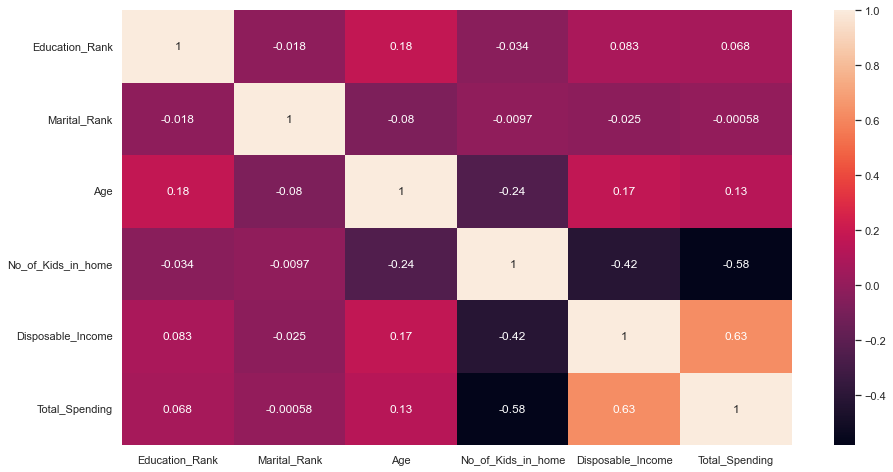

In [53]:
#correlation heat map of specified columns
sns.heatmap(df[['Education_Rank', 'Marital_Rank', 'Age', 'No_of_Kids_in_home','Disposable_Income', 'Total_Spending']]
.corr(), annot=True
)


<AxesSubplot:>

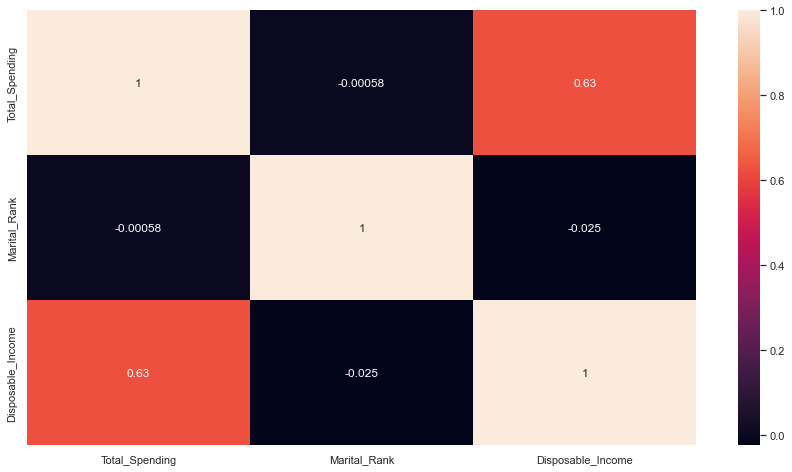

In [54]:
sns.heatmap(df[['Total_Spending', 'Marital_Rank', 'Disposable_Income']]
.corr(), annot=True
)

In [55]:
#removing an outlier
df = df.drop(df[df['Disposable_Income'] == 799999.200000].index)

In [56]:
df.query('Disposable_Income ==799999.200000')


,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response,Year_Date,month,month_name,Weekday,Weekday_name,month_end,Age,Rel_Status,Education_Rank,Marital_Rank,Total_Spending


<AxesSubplot:xlabel='Disposable_Income', ylabel='Total_Spending'>

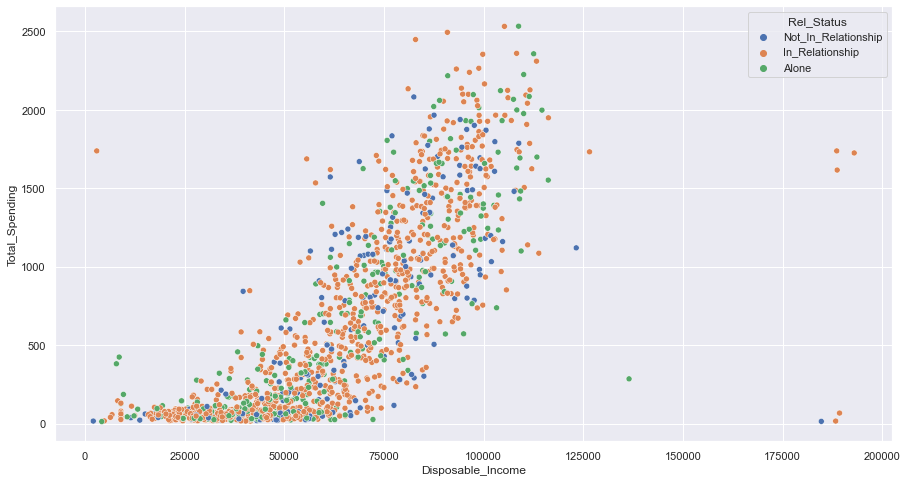

In [57]:
#How relationship status and disposable income determines spending
sns.scatterplot(y= 'Total_Spending', x = 'Disposable_Income', hue = 'Rel_Status', data = df)

<AxesSubplot:xlabel='Disposable_Income', ylabel='Total_Spending'>

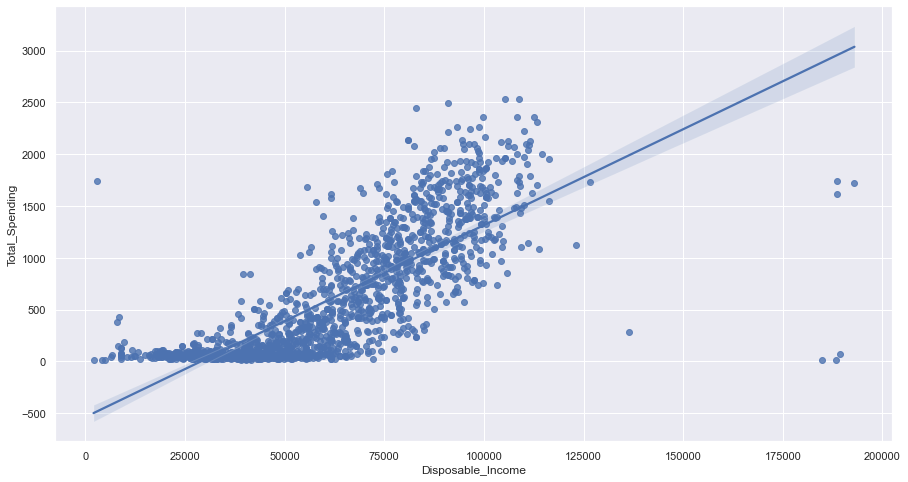

In [58]:
sns.regplot(y= 'Total_Spending', x = 'Disposable_Income', data = df )

<AxesSubplot:xlabel='Education_Rank', ylabel='Total_Spending'>

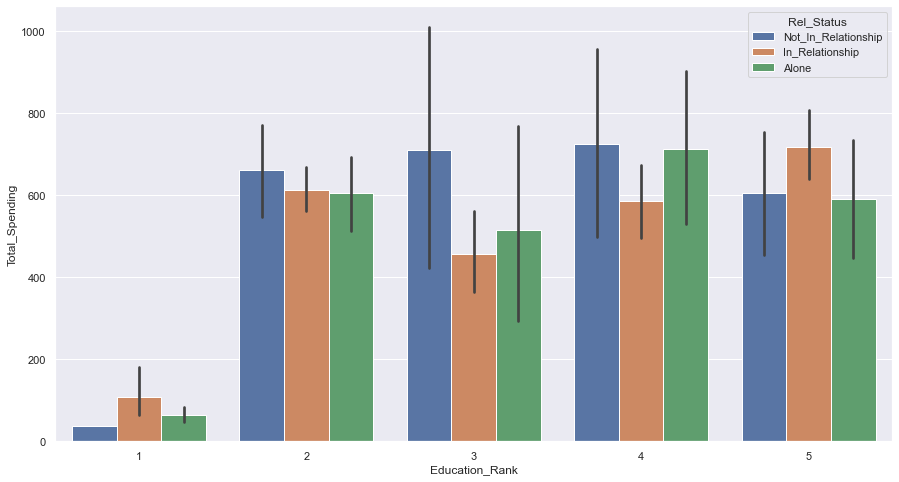

In [59]:
#Educational status of your customers and how they spend
sns.barplot(y= 'Total_Spending', x = 'Education_Rank', hue = 'Rel_Status', data = df, ci = 95)

In [60]:
df.columns

Index(['ID', 'Year_of_Birth', 'Education_Level', 'Marital_Status',
       'Disposable_Income', 'No_of_Kids_in_home', 'No_of_Teen_in_home',
       'Date_Customer', 'Recency', 'Discounted_Purchases', 'WebPurchases',
       'CatalogPurchases', 'StorePurchases', 'Amount_on_Wines',
       'Amount_on_Fruits', 'Amount_on_MeatProducts', 'Amount_on_FishProducts',
       'Amount_on_SweetProducts', 'Amount_on_GoldProds', 'WebVisitsMonth',
       'Cmp3Accepted', 'Cmp4Accepted', 'Cmp5Accepted', 'Cmp1Accepted',
       'Cmp2Accepted', 'Any_Complain', 'Response', 'Year_Date', 'month',
       'month_name', 'Weekday', 'Weekday_name', 'month_end', 'Age',
       'Rel_Status', 'Education_Rank', 'Marital_Rank', 'Total_Spending'],
      dtype='object')

<AxesSubplot:xlabel='Education_Level', ylabel='Disposable_Income'>

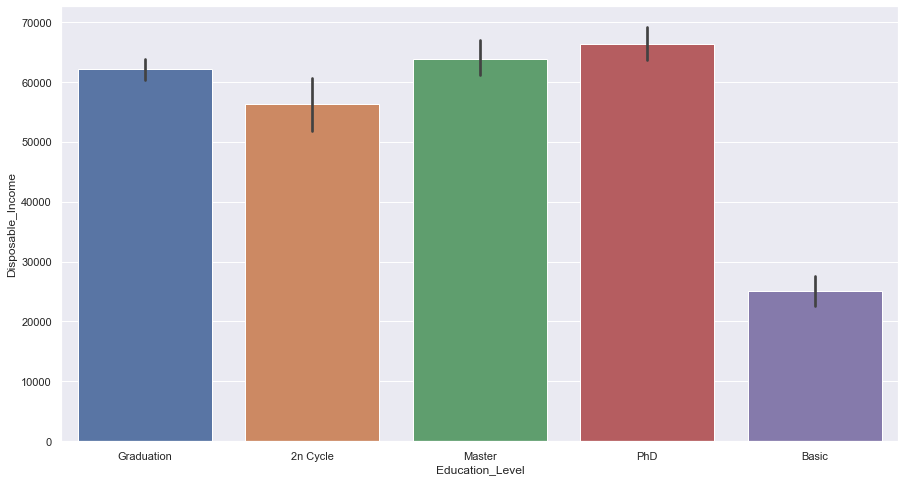

In [61]:
# Edu level and disp income

sns.barplot(x= 'Education_Level', y = 'Disposable_Income',data = df, ci = 95)

<AxesSubplot:xlabel='Education_Level', ylabel='count'>

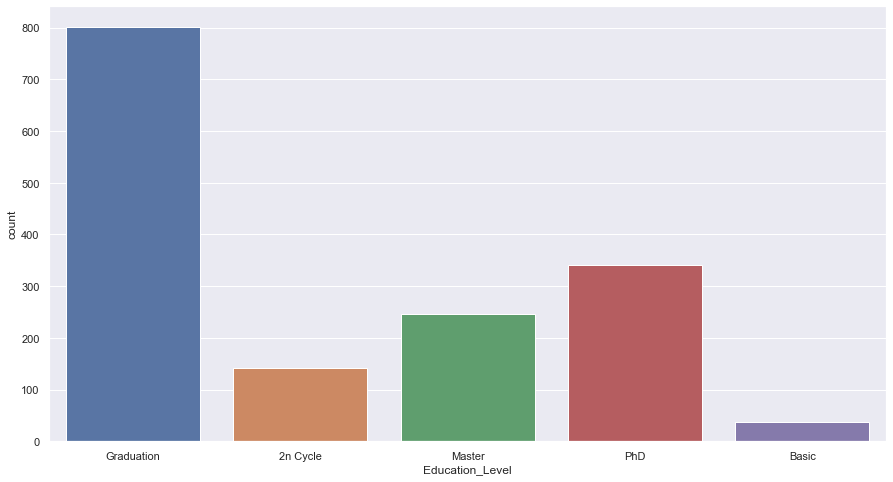

In [62]:
sns.countplot( x = df["Education_Level"])

In [63]:
# using the mean of the education level columbs to plot the education level vs disposable income.

mean_edu_level = df2.groupby(["Education_Level"])[["Disposable_Income"]].mean().sort_values("Disposable_Income",ascending=False)
mean_edu_level

,Disposable_Income
Education_Level,
PhD,66377.692857
Master,63849.029752
Graduation,63115.059623
2n Cycle,56237.140426
Basic,25140.063158


<AxesSubplot:xlabel='Education_Level', ylabel='Disposable_Income'>

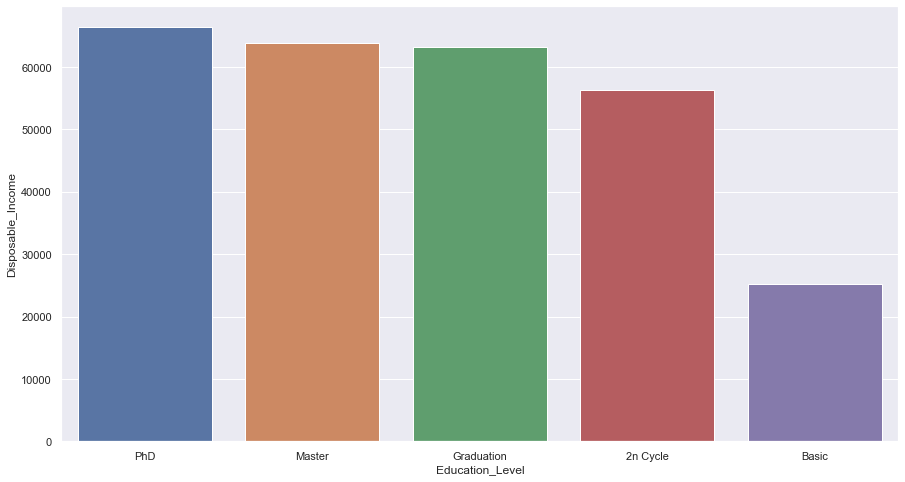

In [64]:
# using .index since the education_level is an index not an actual column

sns.barplot(y = 'Disposable_Income', x = mean_edu_level.index, data = mean_edu_level, ci = 95)

PhD has the highest disposable income with Basic education level having the lowest.

In [65]:
# total spending as a fraction of the disposable income

df["fraction_dispo_income_spent"] = df.Total_Spending / df.Disposable_Income
df[["Disposable_Income","Total_Spending","fraction_dispo_income_spent"]].head()

,Disposable_Income,Total_Spending,fraction_dispo_income_spent
0,77504.4,116,0.001497
1,56784.0,422,0.007432
2,103714.8,1457,0.014048
3,46311.6,185,0.003995
4,87486.0,1523,0.017408


<AxesSubplot:xlabel='Education_Level', ylabel='fraction_dispo_income_spent'>

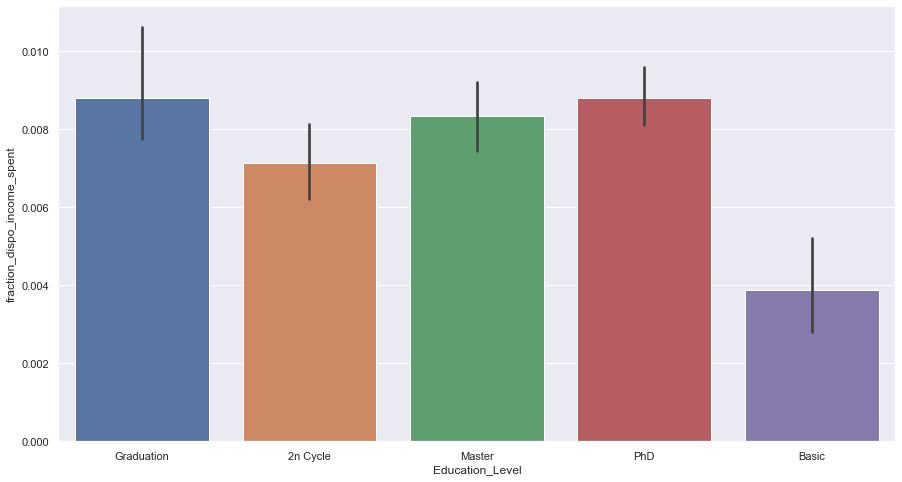

In [66]:
# barplot of fraction spent vs the education level

sns.barplot(y = 'fraction_dispo_income_spent', x = "Education_Level", data = df, ci = 95)

In [67]:
df.columns

Index(['ID', 'Year_of_Birth', 'Education_Level', 'Marital_Status',
       'Disposable_Income', 'No_of_Kids_in_home', 'No_of_Teen_in_home',
       'Date_Customer', 'Recency', 'Discounted_Purchases', 'WebPurchases',
       'CatalogPurchases', 'StorePurchases', 'Amount_on_Wines',
       'Amount_on_Fruits', 'Amount_on_MeatProducts', 'Amount_on_FishProducts',
       'Amount_on_SweetProducts', 'Amount_on_GoldProds', 'WebVisitsMonth',
       'Cmp3Accepted', 'Cmp4Accepted', 'Cmp5Accepted', 'Cmp1Accepted',
       'Cmp2Accepted', 'Any_Complain', 'Response', 'Year_Date', 'month',
       'month_name', 'Weekday', 'Weekday_name', 'month_end', 'Age',
       'Rel_Status', 'Education_Rank', 'Marital_Rank', 'Total_Spending',
       'fraction_dispo_income_spent'],
      dtype='object')

<AxesSubplot:xlabel='Education_Level', ylabel='No_of_Kids_in_home'>

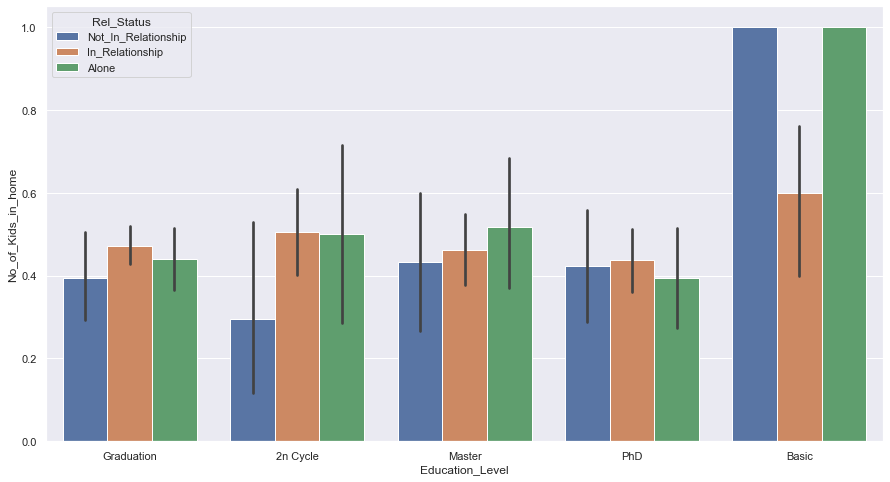

In [68]:
# no of kids vs education level

sns.barplot(x = 'Education_Level', y = "No_of_Kids_in_home", hue = "Rel_Status",data = df, ci = 95)

In [69]:
# adding the number of kids and nomof teenagers in a home

df["dependants"] =df['No_of_Kids_in_home'] + df["No_of_Teen_in_home"]


In [70]:
df["dependants"].value_counts()

1    807
0    433
2    287
3     40
Name: dependants, dtype: int64

<AxesSubplot:xlabel='Education_Level', ylabel='dependants'>

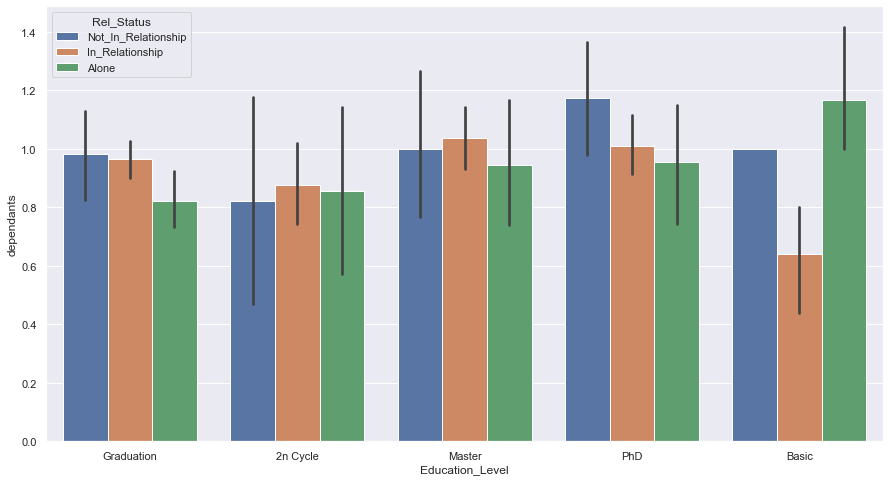

In [71]:
# barplot visualization for both the teenagers and kids in a home 

sns.barplot(x = 'Education_Level', y = "dependants", hue = "Rel_Status",data = df, ci = 95)

<AxesSubplot:xlabel='Age', ylabel='Total_Spending'>

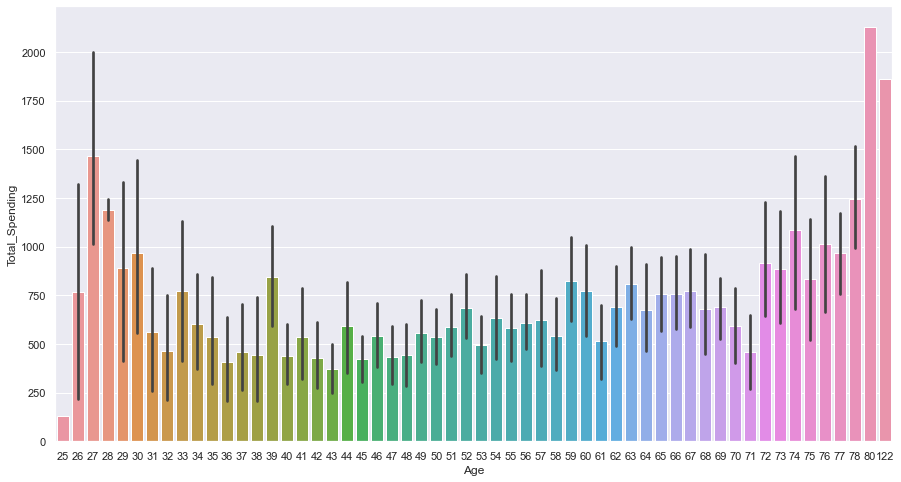

In [72]:
# age and spending

sns.barplot(x = 'Age', y = "Total_Spending",data = df, ci = 95)

In [73]:
df.Age.max()

122

In [74]:
bins = [22,35,45,65,125]
labels = ["Early_Adulthood","Early_middle_Age","Late_middle_Age","Late_Adulthood"]
df["Age_Group"] = pd.cut(df["Age"], bins = bins ,labels = labels, right = False)


In [75]:
df.head()

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response,Year_Date,month,month_name,Weekday,Weekday_name,month_end,Age,Rel_Status,Education_Rank,Marital_Rank,Total_Spending,fraction_dispo_income_spent,dependants,Age_Group
0,ID_4A9AR6FQ,1955,Graduation,Divorced,77504.4,1,1,2014-06-22,56,2,1,1,4,71,3,16,0,6,20,3,0,0,0,0,0,0,0,2014,6,Jun,6,Sunday,False,67,Not_In_Relationship,2,2,116,0.001497,2,Late_Adulthood
1,ID_X28T3VEK,1958,Graduation,Together,56784.0,0,1,2013-01-08,17,6,5,1,8,205,22,111,50,15,19,6,0,0,0,0,0,0,0,2013,1,Jan,1,Tuesday,False,64,In_Relationship,2,1,422,0.007432,1,Late_middle_Age
2,ID_AWXARH57,1962,Graduation,Single,103714.8,0,0,2013-11-21,17,0,7,4,7,469,31,873,29,18,37,2,0,0,0,1,0,0,1,2013,11,Nov,3,Thursday,False,60,Alone,2,3,1457,0.014048,0,Late_middle_Age
3,ID_FQVZHE81,1979,2n Cycle,Single,46311.6,1,0,2013-09-13,49,3,4,1,3,56,15,49,17,24,24,8,0,0,0,0,0,0,0,2013,9,Sep,4,Friday,False,43,Alone,3,3,185,0.003995,1,Early_middle_Age
4,ID_QVLWGPRN,1959,Graduation,Married,87486.0,0,0,2014-01-21,59,1,3,7,9,412,117,445,181,165,203,1,0,0,0,1,0,0,0,2014,1,Jan,1,Tuesday,False,63,In_Relationship,2,1,1523,0.017408,0,Late_middle_Age


In [76]:
df[["Age","Age_Group"]].sample(10)

,Age,Age_Group
4,63,Late_middle_Age
801,43,Early_middle_Age
1293,45,Late_middle_Age
209,44,Early_middle_Age
1382,43,Early_middle_Age
744,33,Early_Adulthood
431,62,Late_middle_Age
570,51,Late_middle_Age
1025,43,Early_middle_Age
1269,43,Early_middle_Age


<AxesSubplot:xlabel='Age_Group', ylabel='Total_Spending'>

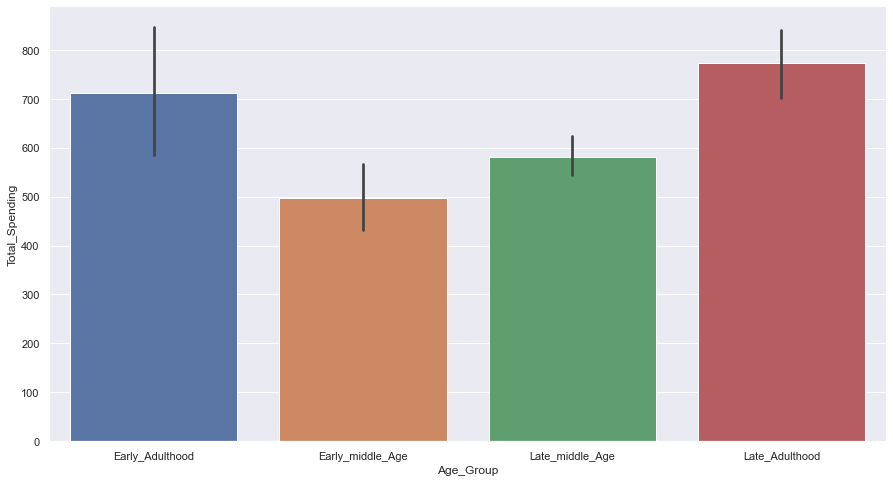

In [77]:
# plotting the age goupings vs total spending

sns.barplot(x = 'Age_Group', y = "Total_Spending",data = df)

In [78]:
df.head(10)

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response,Year_Date,month,month_name,Weekday,Weekday_name,month_end,Age,Rel_Status,Education_Rank,Marital_Rank,Total_Spending,fraction_dispo_income_spent,dependants,Age_Group
0,ID_4A9AR6FQ,1955,Graduation,Divorced,77504.4,1,1,2014-06-22,56,2,1,1,4,71,3,16,0,6,20,3,0,0,0,0,0,0,0,2014,6,Jun,6,Sunday,False,67,Not_In_Relationship,2,2,116,0.001497,2,Late_Adulthood
1,ID_X28T3VEK,1958,Graduation,Together,56784.0,0,1,2013-01-08,17,6,5,1,8,205,22,111,50,15,19,6,0,0,0,0,0,0,0,2013,1,Jan,1,Tuesday,False,64,In_Relationship,2,1,422,0.007432,1,Late_middle_Age
2,ID_AWXARH57,1962,Graduation,Single,103714.8,0,0,2013-11-21,17,0,7,4,7,469,31,873,29,18,37,2,0,0,0,1,0,0,1,2013,11,Nov,3,Thursday,False,60,Alone,2,3,1457,0.014048,0,Late_middle_Age
3,ID_FQVZHE81,1979,2n Cycle,Single,46311.6,1,0,2013-09-13,49,3,4,1,3,56,15,49,17,24,24,8,0,0,0,0,0,0,0,2013,9,Sep,4,Friday,False,43,Alone,3,3,185,0.003995,1,Early_middle_Age
4,ID_QVLWGPRN,1959,Graduation,Married,87486.0,0,0,2014-01-21,59,1,3,7,9,412,117,445,181,165,203,1,0,0,0,1,0,0,0,2014,1,Jan,1,Tuesday,False,63,In_Relationship,2,1,1523,0.017408,0,Late_middle_Age
5,ID_3S3HRGH6,1960,Master,Married,41090.4,0,1,2014-03-23,32,1,0,0,3,13,5,4,0,0,1,5,0,0,0,0,0,0,0,2014,3,Mar,6,Sunday,False,62,In_Relationship,4,1,23,0.000560,1,Late_middle_Age
6,ID_KJQ9B2LE,1953,Graduation,Single,86673.6,0,0,2012-11-27,94,1,6,7,8,636,31,491,30,14,56,3,0,0,0,0,0,0,0,2012,11,Nov,1,Tuesday,False,69,Alone,2,3,1258,0.014514,0,Late_Adulthood
7,ID_6O0NBZXD,1974,Graduation,Together,88711.2,0,0,2013-02-03,61,1,6,5,12,632,94,597,159,91,15,3,0,0,0,0,0,0,0,2013,2,Feb,6,Sunday,False,48,In_Relationship,2,1,1588,0.017901,0,Late_middle_Age
8,ID_M3QFT8WO,1966,Graduation,Together,35606.4,1,1,2013-12-03,13,1,0,0,3,14,4,3,0,4,8,6,0,0,0,0,0,0,0,2013,12,Dec,1,Tuesday,False,56,In_Relationship,2,1,33,0.000927,2,Late_middle_Age
9,ID_745JV5PY,1975,Graduation,Married,41305.2,1,0,2013-01-07,88,1,1,0,2,8,6,7,6,2,9,7,0,0,0,0,0,0,0,2013,1,Jan,0,Monday,False,47,In_Relationship,2,1,38,0.000920,1,Late_middle_Age


What kind of purchase is associated with age groups or educational group\
Age group vs total purchases\
Difference between the type of purchases\
group amount_on columns to check what people buy the most\
Type of purchase associated with Marital status and Educational level\
Determine month with highest customer join (line n bar)\
Effect of join period on spending, medium, camp_resp\ 
Which product has more purchases\
trend for web visit for age group and educational status\
Relationship between web visits and camp accepted\
Total spending vs camp accepted\


In [79]:
df.columns

Index(['ID', 'Year_of_Birth', 'Education_Level', 'Marital_Status',
       'Disposable_Income', 'No_of_Kids_in_home', 'No_of_Teen_in_home',
       'Date_Customer', 'Recency', 'Discounted_Purchases', 'WebPurchases',
       'CatalogPurchases', 'StorePurchases', 'Amount_on_Wines',
       'Amount_on_Fruits', 'Amount_on_MeatProducts', 'Amount_on_FishProducts',
       'Amount_on_SweetProducts', 'Amount_on_GoldProds', 'WebVisitsMonth',
       'Cmp3Accepted', 'Cmp4Accepted', 'Cmp5Accepted', 'Cmp1Accepted',
       'Cmp2Accepted', 'Any_Complain', 'Response', 'Year_Date', 'month',
       'month_name', 'Weekday', 'Weekday_name', 'month_end', 'Age',
       'Rel_Status', 'Education_Rank', 'Marital_Rank', 'Total_Spending',
       'fraction_dispo_income_spent', 'dependants', 'Age_Group'],
      dtype='object')

<AxesSubplot:xlabel='Age_Group'>

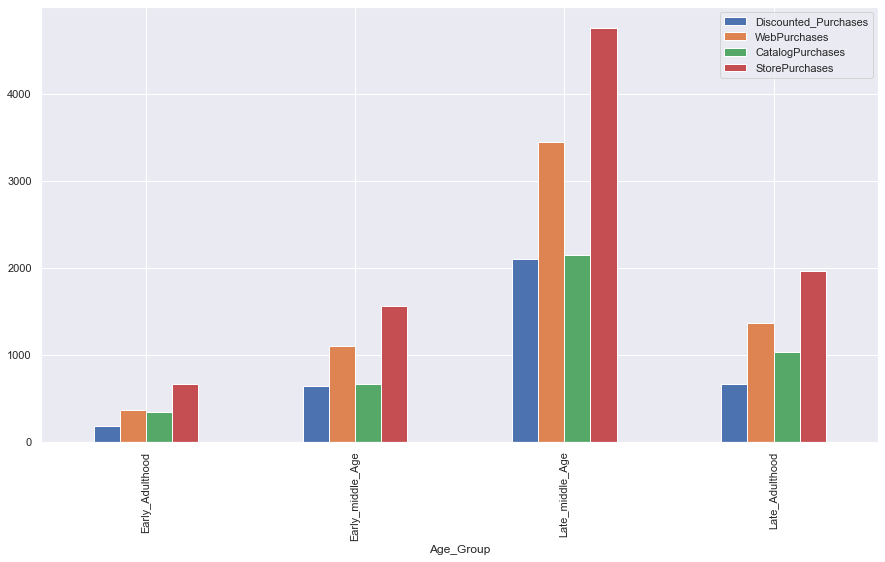

In [98]:
# What kind of purchase is associated with age groups or educational group
x=df.groupby('Age_Group')[['Discounted_Purchases', 'WebPurchases', 'CatalogPurchases','StorePurchases']].sum()
x.plot.bar()

In [82]:
df['Total_Purchases']=df['Discounted_Purchases']+df['WebPurchases']+df['CatalogPurchases']+df['StorePurchases']


In [84]:
df[['Discounted_Purchases','WebPurchases','CatalogPurchases','StorePurchases','Total_Purchases']].head()

,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Total_Purchases
0,2,1,1,4,8
1,6,5,1,8,20
2,0,7,4,7,18
3,3,4,1,3,11
4,1,3,7,9,20


<AxesSubplot:xlabel='Age_Group', ylabel='Total_Purchases'>

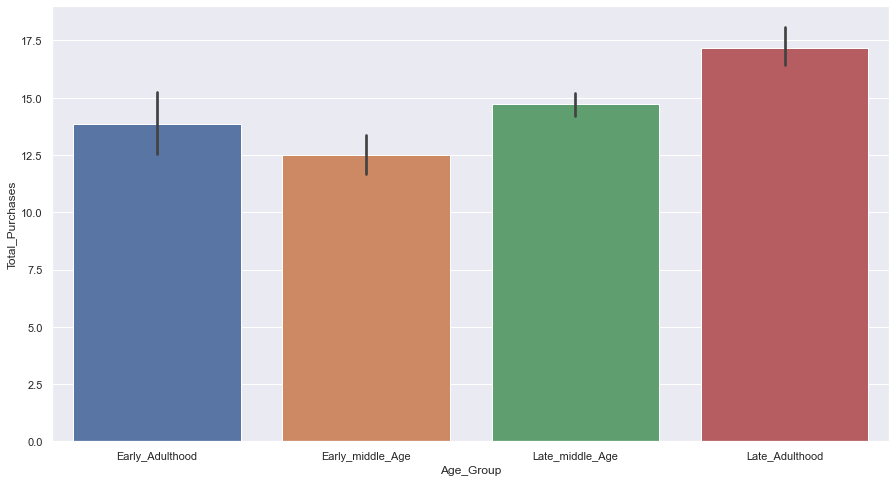

In [85]:
sns.barplot(x = 'Age_Group', y = "Total_Purchases",data = df)

<AxesSubplot:xlabel='Age_Group', ylabel='Total_Purchases'>

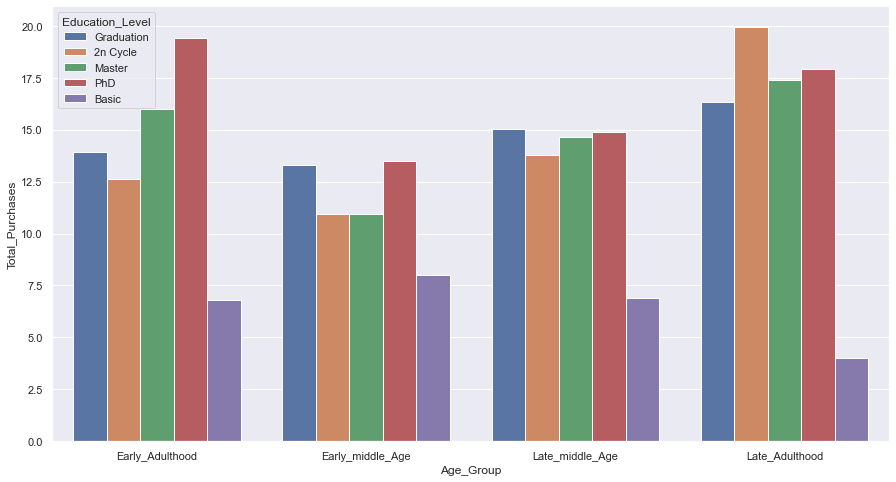

In [100]:
sns.barplot(x= 'Age_Group', y= 'Total_Purchases', data=df, hue='Education_Level', ci=None)


In [90]:
x['Total_Purchases']=x['Discounted_Purchases']+x['WebPurchases']+x['CatalogPurchases']+x['StorePurchases']

In [91]:
x

,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Total_Purchases
Age_Group,,,,,
Early_Adulthood,184,366,344,659,1553
Early_middle_Age,642,1094,664,1556,3956
Late_middle_Age,2105,3445,2143,4760,12453
Late_Adulthood,660,1366,1028,1965,5019


<AxesSubplot:xlabel='Age_Group', ylabel='Total_Purchases'>

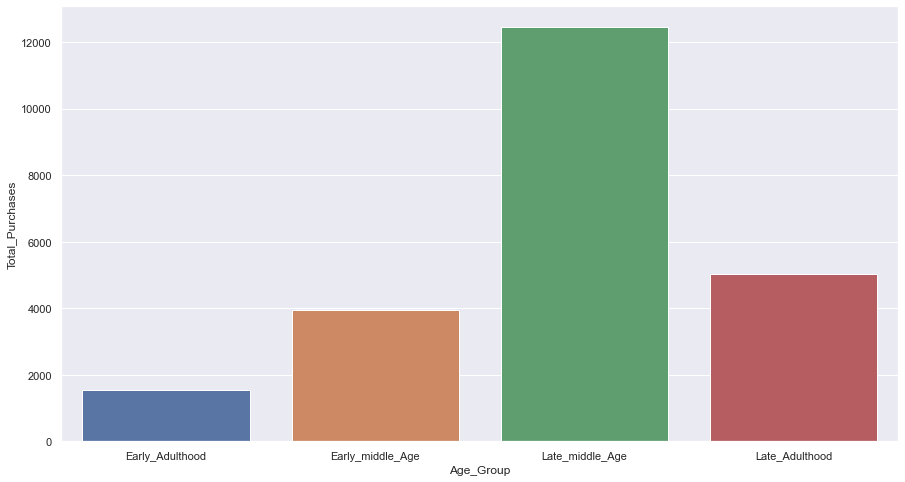

In [93]:
sns.barplot(x.index,y='Total_Purchases', data=x)

<AxesSubplot:xlabel='Age_Group', ylabel='Total_Purchases'>

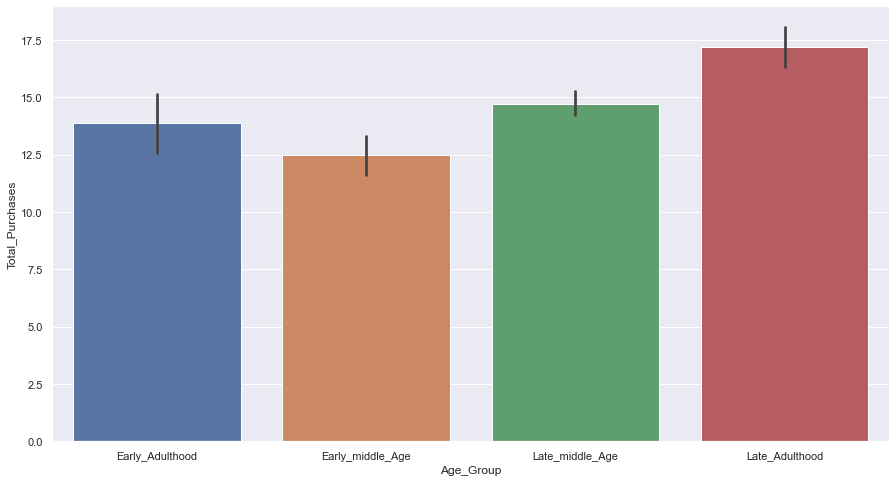

In [96]:
x=['Age_Group']
y=['Discounted_Purchases', 'WebPurchases', 'CatalogPurchases','StorePurchases']
sns.barplot(x = 'Age_Group', y = "Total_Purchases",data = df)

<AxesSubplot:xlabel='Education_Level'>

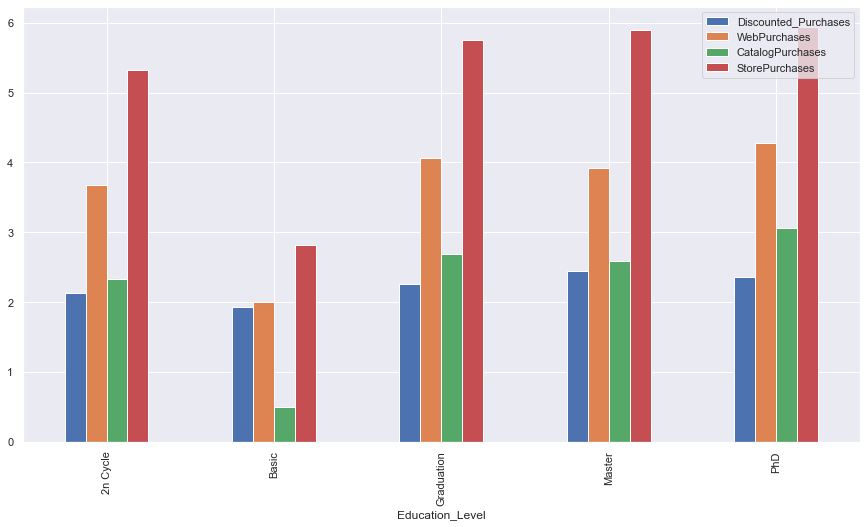

In [111]:
d=df.groupby('Education_Level')[['Discounted_Purchases', 'WebPurchases', 'CatalogPurchases','StorePurchases']].mean()
d.plot.bar()

In [102]:
df['Education_Level'].value_counts()

Graduation    801
PhD           340
Master        246
2n Cycle      142
Basic          38
Name: Education_Level, dtype: int64

In [103]:
df['Age_Group'].value_counts()

Late_middle_Age     846
Early_middle_Age    317
Late_Adulthood      292
Early_Adulthood     112
Name: Age_Group, dtype: int64

<AxesSubplot:xlabel='Education_Level'>

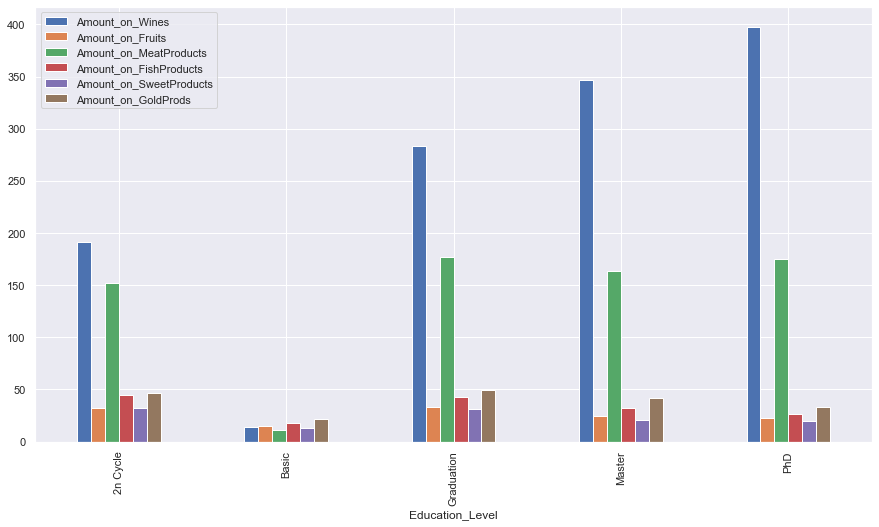

In [105]:
#group amount_on columns to check what people buy the most
e=df.groupby('Education_Level')[['Amount_on_Wines','Amount_on_Fruits', 'Amount_on_MeatProducts', 'Amount_on_FishProducts',
       'Amount_on_SweetProducts', 'Amount_on_GoldProds']].mean()
e.plot.bar()

<AxesSubplot:xlabel='Age_Group'>

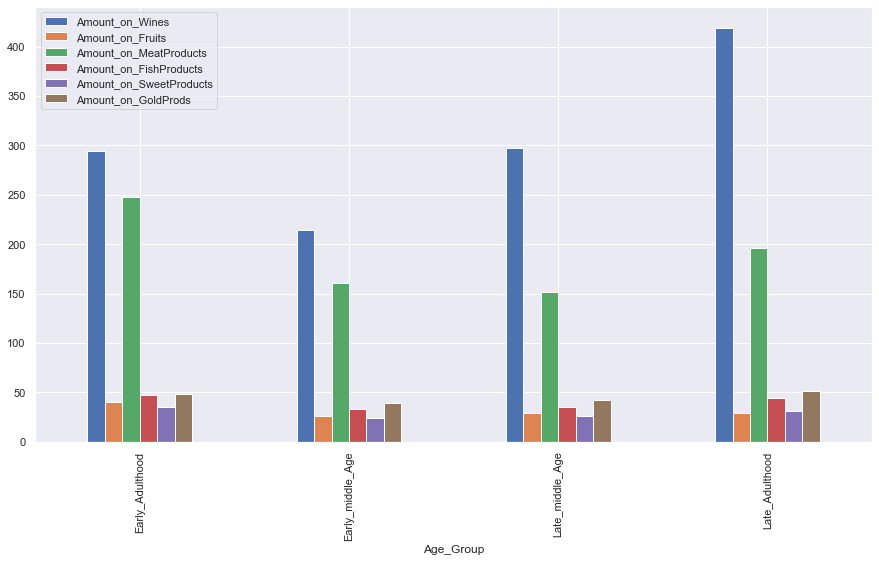

In [106]:
f=df.groupby('Age_Group')[['Amount_on_Wines','Amount_on_Fruits', 'Amount_on_MeatProducts', 'Amount_on_FishProducts',
       'Amount_on_SweetProducts', 'Amount_on_GoldProds']].mean()
f.plot.bar()

<AxesSubplot:>

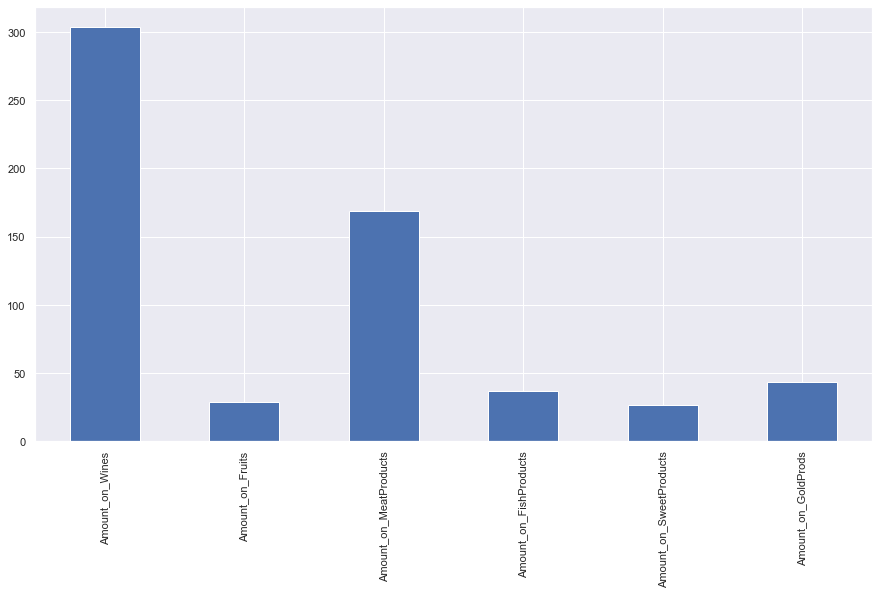

In [107]:
g=df[['Amount_on_Wines','Amount_on_Fruits', 'Amount_on_MeatProducts', 'Amount_on_FishProducts',
       'Amount_on_SweetProducts', 'Amount_on_GoldProds']].mean()
g.plot.bar()

<AxesSubplot:xlabel='Rel_Status'>

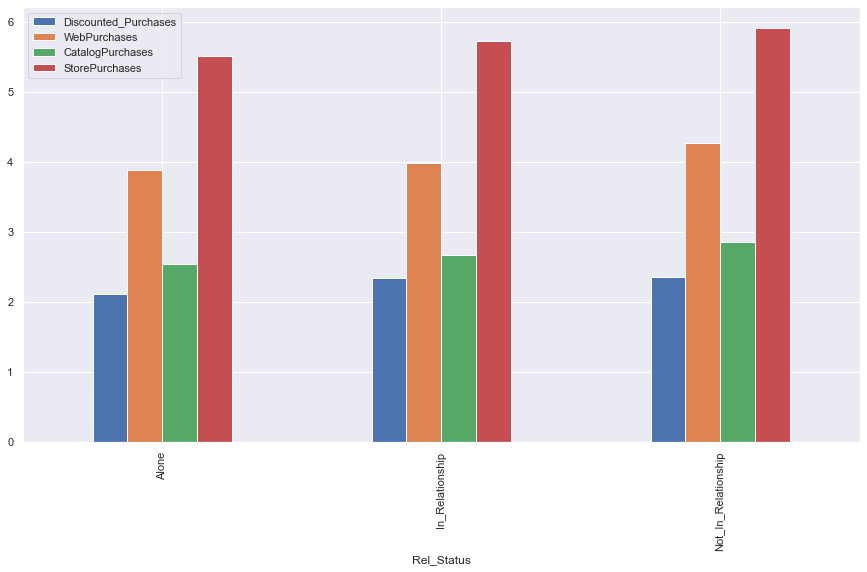

In [110]:
o=df.groupby('Rel_Status')[['Discounted_Purchases', 'WebPurchases', 'CatalogPurchases','StorePurchases']].mean()
o.plot.bar()

<AxesSubplot:xlabel='Rel_Status'>

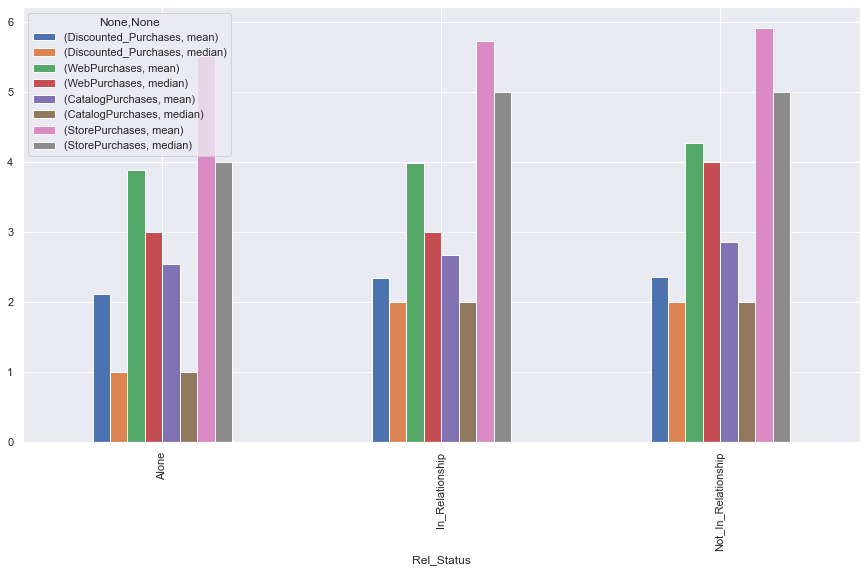

In [129]:
p=df.groupby('Rel_Status')[['Discounted_Purchases', 'WebPurchases', 'CatalogPurchases','StorePurchases']].agg(['mean','median'])
p.plot.bar()

In [130]:
p

Discounted_Purchases        WebPurchases         \
                                    mean median         mean median   
Rel_Status                                                            
Alone                           2.113433    1.0     3.877612    3.0   
In_Relationship                 2.337243    2.0     3.989247    3.0   
Not_In_Relationship             2.354067    2.0     4.263158    4.0   

                    CatalogPurchases        StorePurchases         
                                mean median           mean median  
Rel_Status                                                         
Alone                       2.537313    1.0       5.504478    4.0  
In_Relationship             2.670577    2.0       5.728250    5.0  
Not_In_Relationship         2.856459    2.0       5.913876    5.0

<AxesSubplot:xlabel='month'>

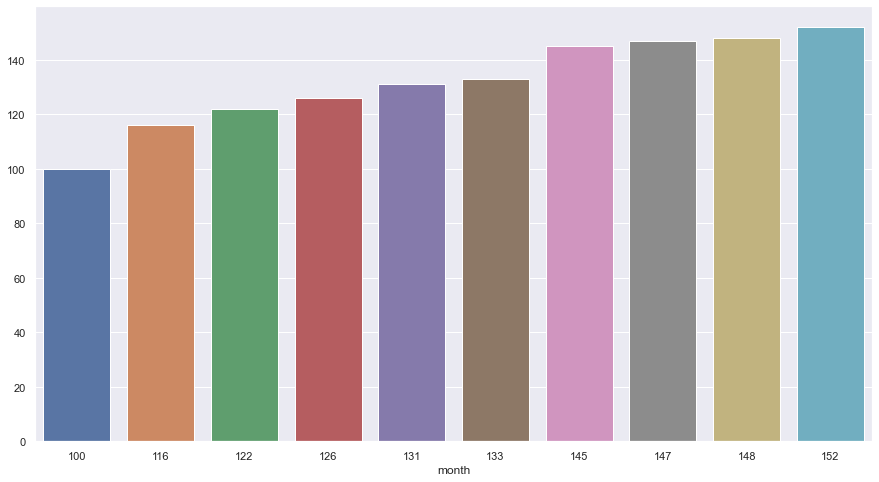

In [142]:
#Determine month with highest customer join (line n bar)
#sns.lineplot('month', data=df)
k=df.groupby("month_name")['month'].count()
sns.barplot(x=k.index, y=k.values,data=k)

In [137]:
k

month_name
Apr    116
Aug    147
Dec    145
Feb    133
Jan    126
Jul    100
Jun    116
Mar    152
May    131
Nov    131
Oct    148
Sep    122
Name: month, dtype: int64

In [140]:
k.index

Index(['Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov',
       'Oct', 'Sep'],
      dtype='object', name='month_name')

In [141]:
k.values

array([116, 147, 145, 133, 126, 100, 116, 152, 131, 131, 148, 122],
      dtype=int64)

<AxesSubplot:xlabel='month_name', ylabel='count'>

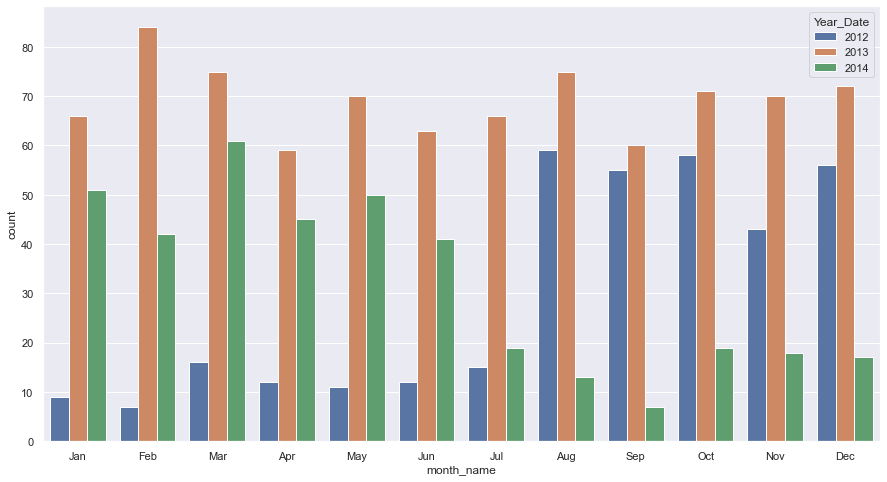

In [153]:
Months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

sns.countplot(x = 'month_name', data = df, hue='Year_Date', order=Months)


<AxesSubplot:xlabel='Date_Customer', ylabel='Total_Purchases'>

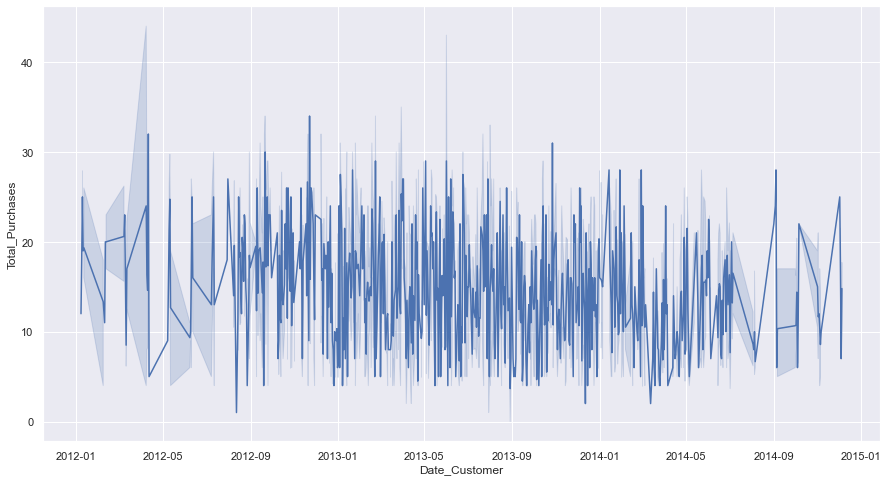

In [160]:
#plt.plot('month','Total_Purchases', data=df)
# line plot
sns.lineplot(data=df, x='Date_Customer', y='Total_Purchases') 


In [176]:
s=df.groupby(['Year_Date','month_name'])[['month_name']].count()

In [177]:
s

month_name
Year_Date month_name            
2012      Apr                 12
          Aug                 59
          Dec                 56
          Feb                  7
          Jan                  9
          Jul                 15
          Jun                 12
          Mar                 16
          May                 11
          Nov                 43
          Oct                 58
          Sep                 55
2013      Apr                 59
          Aug                 75
          Dec                 72
          Feb                 84
          Jan                 66
          Jul                 66
          Jun                 63
          Mar                 75
          May                 70
          Nov                 70
          Oct                 71
          Sep                 60
2014      Apr                 45
          Aug                 13
          Dec                 17
          Feb                 42
          Jan                 51
          Jul                 19
          Jun                 41
          Mar                 61
          May                 50
          Nov                 18
          Oct                 19
          Sep                  7

<AxesSubplot:xlabel='Year_Date,month_name'>

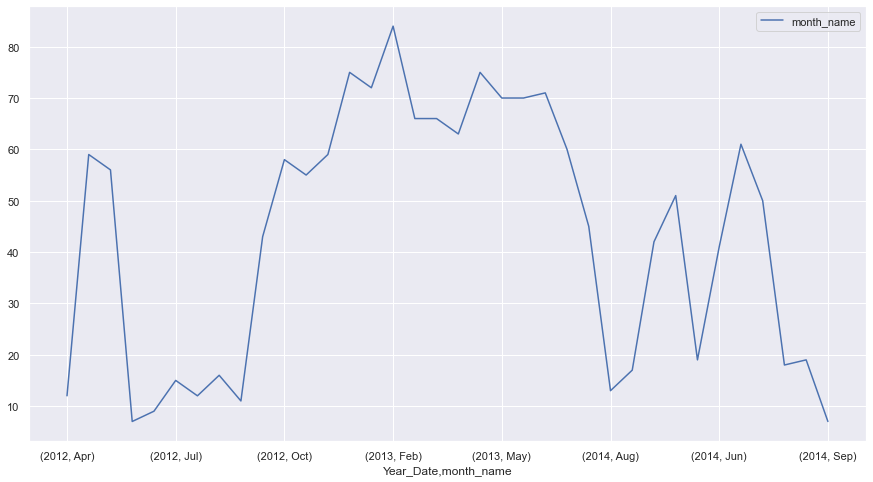

In [178]:
s.plot.line()

In [181]:
#Effect of join period on spending, medium, camp_resp\ Which product has more purchases
j=df.groupby(['Year_Date','month_name'])[['Total_Spending']].mean()

In [182]:
j

Total_Spending
Year_Date month_name                
2012      Apr             612.833333
          Aug             669.101695
          Dec             642.839286
          Feb             674.857143
          Jan             941.777778
          Jul             559.600000
          Jun             656.166667
          Mar             622.437500
          May             875.272727
          Nov             854.023256
          Oct             695.327586
          Sep             978.000000
2013      Apr             652.423729
          Aug             594.853333
          Dec             600.805556
          Feb             677.726190
          Jan             637.454545
          Jul             525.818182
          Jun             573.920635
          Mar             619.226667
          May             658.700000
          Nov             608.700000
          Oct             587.521127
          Sep             541.233333
2014      Apr             369.266667
          Aug             188.615385
          Dec             679.058824
          Feb             608.952381
          Jan             588.666667
          Jul             512.842105
          Jun             555.000000
          Mar             404.196721
          May             478.120000
          Nov             327.666667
          Oct             437.315789
          Sep             580.428571

<AxesSubplot:xlabel='Year_Date,month_name'>

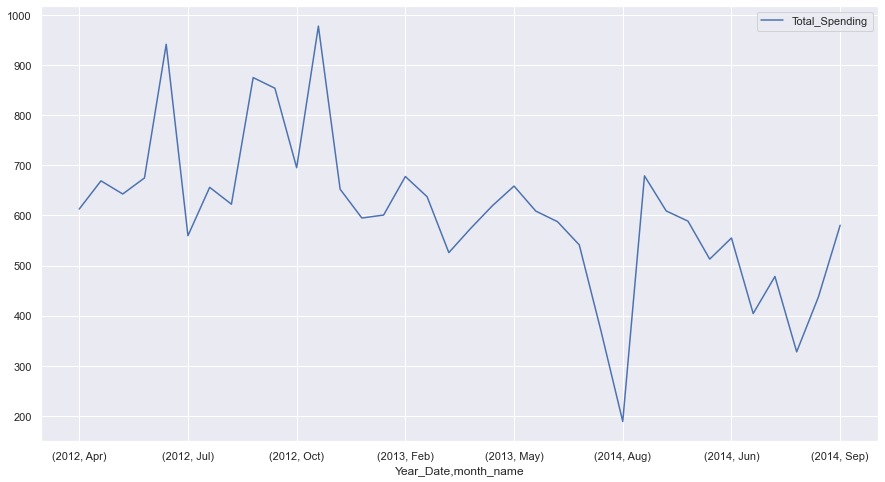

In [183]:
j.plot.line()